# Графики

<!--Этот файл помогает hypertrain11.ipynb правильно нарисовать графики. Без
его помощи hypertrain11.ipynb не справился бы.-->

In [100]:
import json

with open('./report.json') as report:
    report = json.load(report)

In [101]:
import pandas as pd
pd.DataFrame(report['evaluate_RegularNetwork_2_p0_N2'])

noise_factor  accuracy        f1   roc_auc
0           0.00  0.916185  0.919610  0.989121
1           0.04  0.913295  0.916961  0.988632
2           0.08  0.901734  0.905165  0.986697
3           0.12  0.916185  0.919051  0.986363
4           0.16  0.893064  0.897363  0.983613
5           0.20  0.901734  0.905548  0.982616
6           0.24  0.913295  0.916372  0.982005
7           0.28  0.887283  0.889962  0.967709
8           0.32  0.846821  0.851066  0.969926
9           0.36  0.864162  0.865896  0.961206
10          0.40  0.867052  0.871425  0.964624
11          0.44  0.869942  0.871110  0.959250
12          0.48  0.812139  0.817848  0.935650
13          0.52  0.841040  0.843400  0.949727
14          0.56  0.803468  0.808044  0.934862
15          0.60  0.803468  0.810101  0.924093
16          0.64  0.797688  0.798547  0.916773
17          0.68  0.803468  0.809433  0.931492
18          0.72  0.768786  0.781907  0.907557
19          0.76  0.771676  0.777006  0.904174
20          0.80  0.719653  0.725750  0.876120
21          0.84  0.745665  0.739131  0.876391
22          0.88  0.722543  0.716435  0.852764
23          0.92  0.742775  0.746289  0.859944
24          0.96  0.754335  0.751963  0.867514
25          1.00  0.731214  0.727813  0.856764
26          1.04  0.716763  0.718251  0.821690
27          1.08  0.736994  0.738221  0.868382
28          1.12  0.716763  0.714965  0.826961
29          1.16  0.684971  0.679887  0.815638
30          1.20  0.699422  0.698488  0.814674
31          1.24  0.673410  0.668657  0.806772
32          1.28  0.690751  0.689289  0.805750
33          1.32  0.690751  0.682126  0.803867
34          1.36  0.708092  0.703935  0.821830
35          1.40  0.699422  0.672750  0.771015
36          1.44  0.664740  0.654709  0.768750
37          1.48  0.690751  0.673170  0.770336
38          1.52  0.693642  0.667321  0.766740
39          1.56  0.679191  0.666501  0.779504
40          1.60  0.696532  0.667489  0.792666
41          1.64  0.664740  0.655494  0.755083
42          1.68  0.682081  0.640814  0.756202
43          1.72  0.664740  0.634236  0.761468
44          1.76  0.708092  0.689443  0.728590
45          1.80  0.673410  0.648396  0.735852
46          1.84  0.676301  0.642824  0.754639
47          1.88  0.679191  0.656772  0.738141
48          1.92  0.710983  0.674622  0.690174
49          1.96  0.682081  0.638951  0.760113

In [102]:
pd.DataFrame(report['loss_AugmentedReLUNetwork_2_p0.05_N7'])

0
0     1.515457
1     1.316339
2     1.342000
3     1.045563
4     0.997774
...        ...
1155  0.187133
1156  0.145356
1157  0.284774
1158  0.116929
1159  0.017852

[1160 rows x 1 columns]

In [103]:
df = pd.DataFrame([[key] + key.split('_') for key in report.keys()])
df.columns = ['Key', 'Measurement', 'Network', 'Dataset', 'P', 'N']
df.Dataset = df.Dataset.apply(lambda x: int(x))
df.P = df.P.apply(lambda x: float(x[1:]))
df.N = df.N.apply(lambda x: int(x[1:]))
df

Key Measurement  \
0                 loss_RegularNetwork_1_p0_N0        loss   
1           loss_AugmentedReLUNetwork_1_p0_N0        loss   
2                 loss_RegularNetwork_2_p0_N0        loss   
3           loss_AugmentedReLUNetwork_2_p0_N0        loss   
4                 loss_RegularNetwork_3_p0_N0        loss   
..                                        ...         ...   
835        evaluate_RegularNetwork_2_p0.99_N9    evaluate   
836        evaluate_RegularNetwork_3_p0.99_N9    evaluate   
837  evaluate_AugmentedReLUNetwork_1_p0.99_N9    evaluate   
838  evaluate_AugmentedReLUNetwork_2_p0.99_N9    evaluate   
839  evaluate_AugmentedReLUNetwork_3_p0.99_N9    evaluate   

                  Network  Dataset     P  N  
0          RegularNetwork        1  0.00  0  
1    AugmentedReLUNetwork        1  0.00  0  
2          RegularNetwork        2  0.00  0  
3    AugmentedReLUNetwork        2  0.00  0  
4          RegularNetwork        3  0.00  0  
..                    ...      ...   ... ..  
835        RegularNetwork        2  0.99  9  
836        RegularNetwork        3  0.99  9  
837  AugmentedReLUNetwork        1  0.99  9  
838  AugmentedReLUNetwork        2  0.99  9  
839  AugmentedReLUNetwork        3  0.99  9  

[840 rows x 6 columns]

In [104]:
from dataclasses import dataclass

@dataclass
class PlotParams:
    measurement: str
    dataset: int
    network = 'AugmentedReLUNetwork'
    metric: str
    p: int

In [107]:
def compute_dataframe(plot_params: PlotParams) -> pd.DataFrame:
    rows = (
        df
            .loc[df.Measurement == plot_params.measurement]
            .loc[df.Dataset == plot_params.dataset]
            .loc[df.Network == plot_params.network]
            .loc[df.P == plot_params.p]
    )

    if plot_params.measurement == 'loss':
        values = pd.DataFrame([report[row.Key] for row in rows.itertuples()])
    else:
        cols = []
        
        for row in rows.itertuples():
            report_data = report[row.Key]
            cols.append(report_data[plot_params.metric])
            
        values = pd.DataFrame(cols)

    result = values.quantile([0.25, 0.75]).transpose()
    result['mean'] = values.mean()
    return result

# Example:
# pd.concat([compute_dataframe(
#     PlotParams(
#         measurement='evaluate',
#         dataset=1,
#         metric='accuracy',
#         p=0,
#     )
# ), compute_dataframe(
#     PlotParams(
#         measurement='evaluate',
#         dataset=3,
#         metric='mse',
#         p=0.05,
#     )
# ), compute_dataframe(
#     PlotParams(
#         measurement='evaluate',
#         dataset=2,
#         metric='f1',
#         p=0.05,
#     )
# )], axis=1)



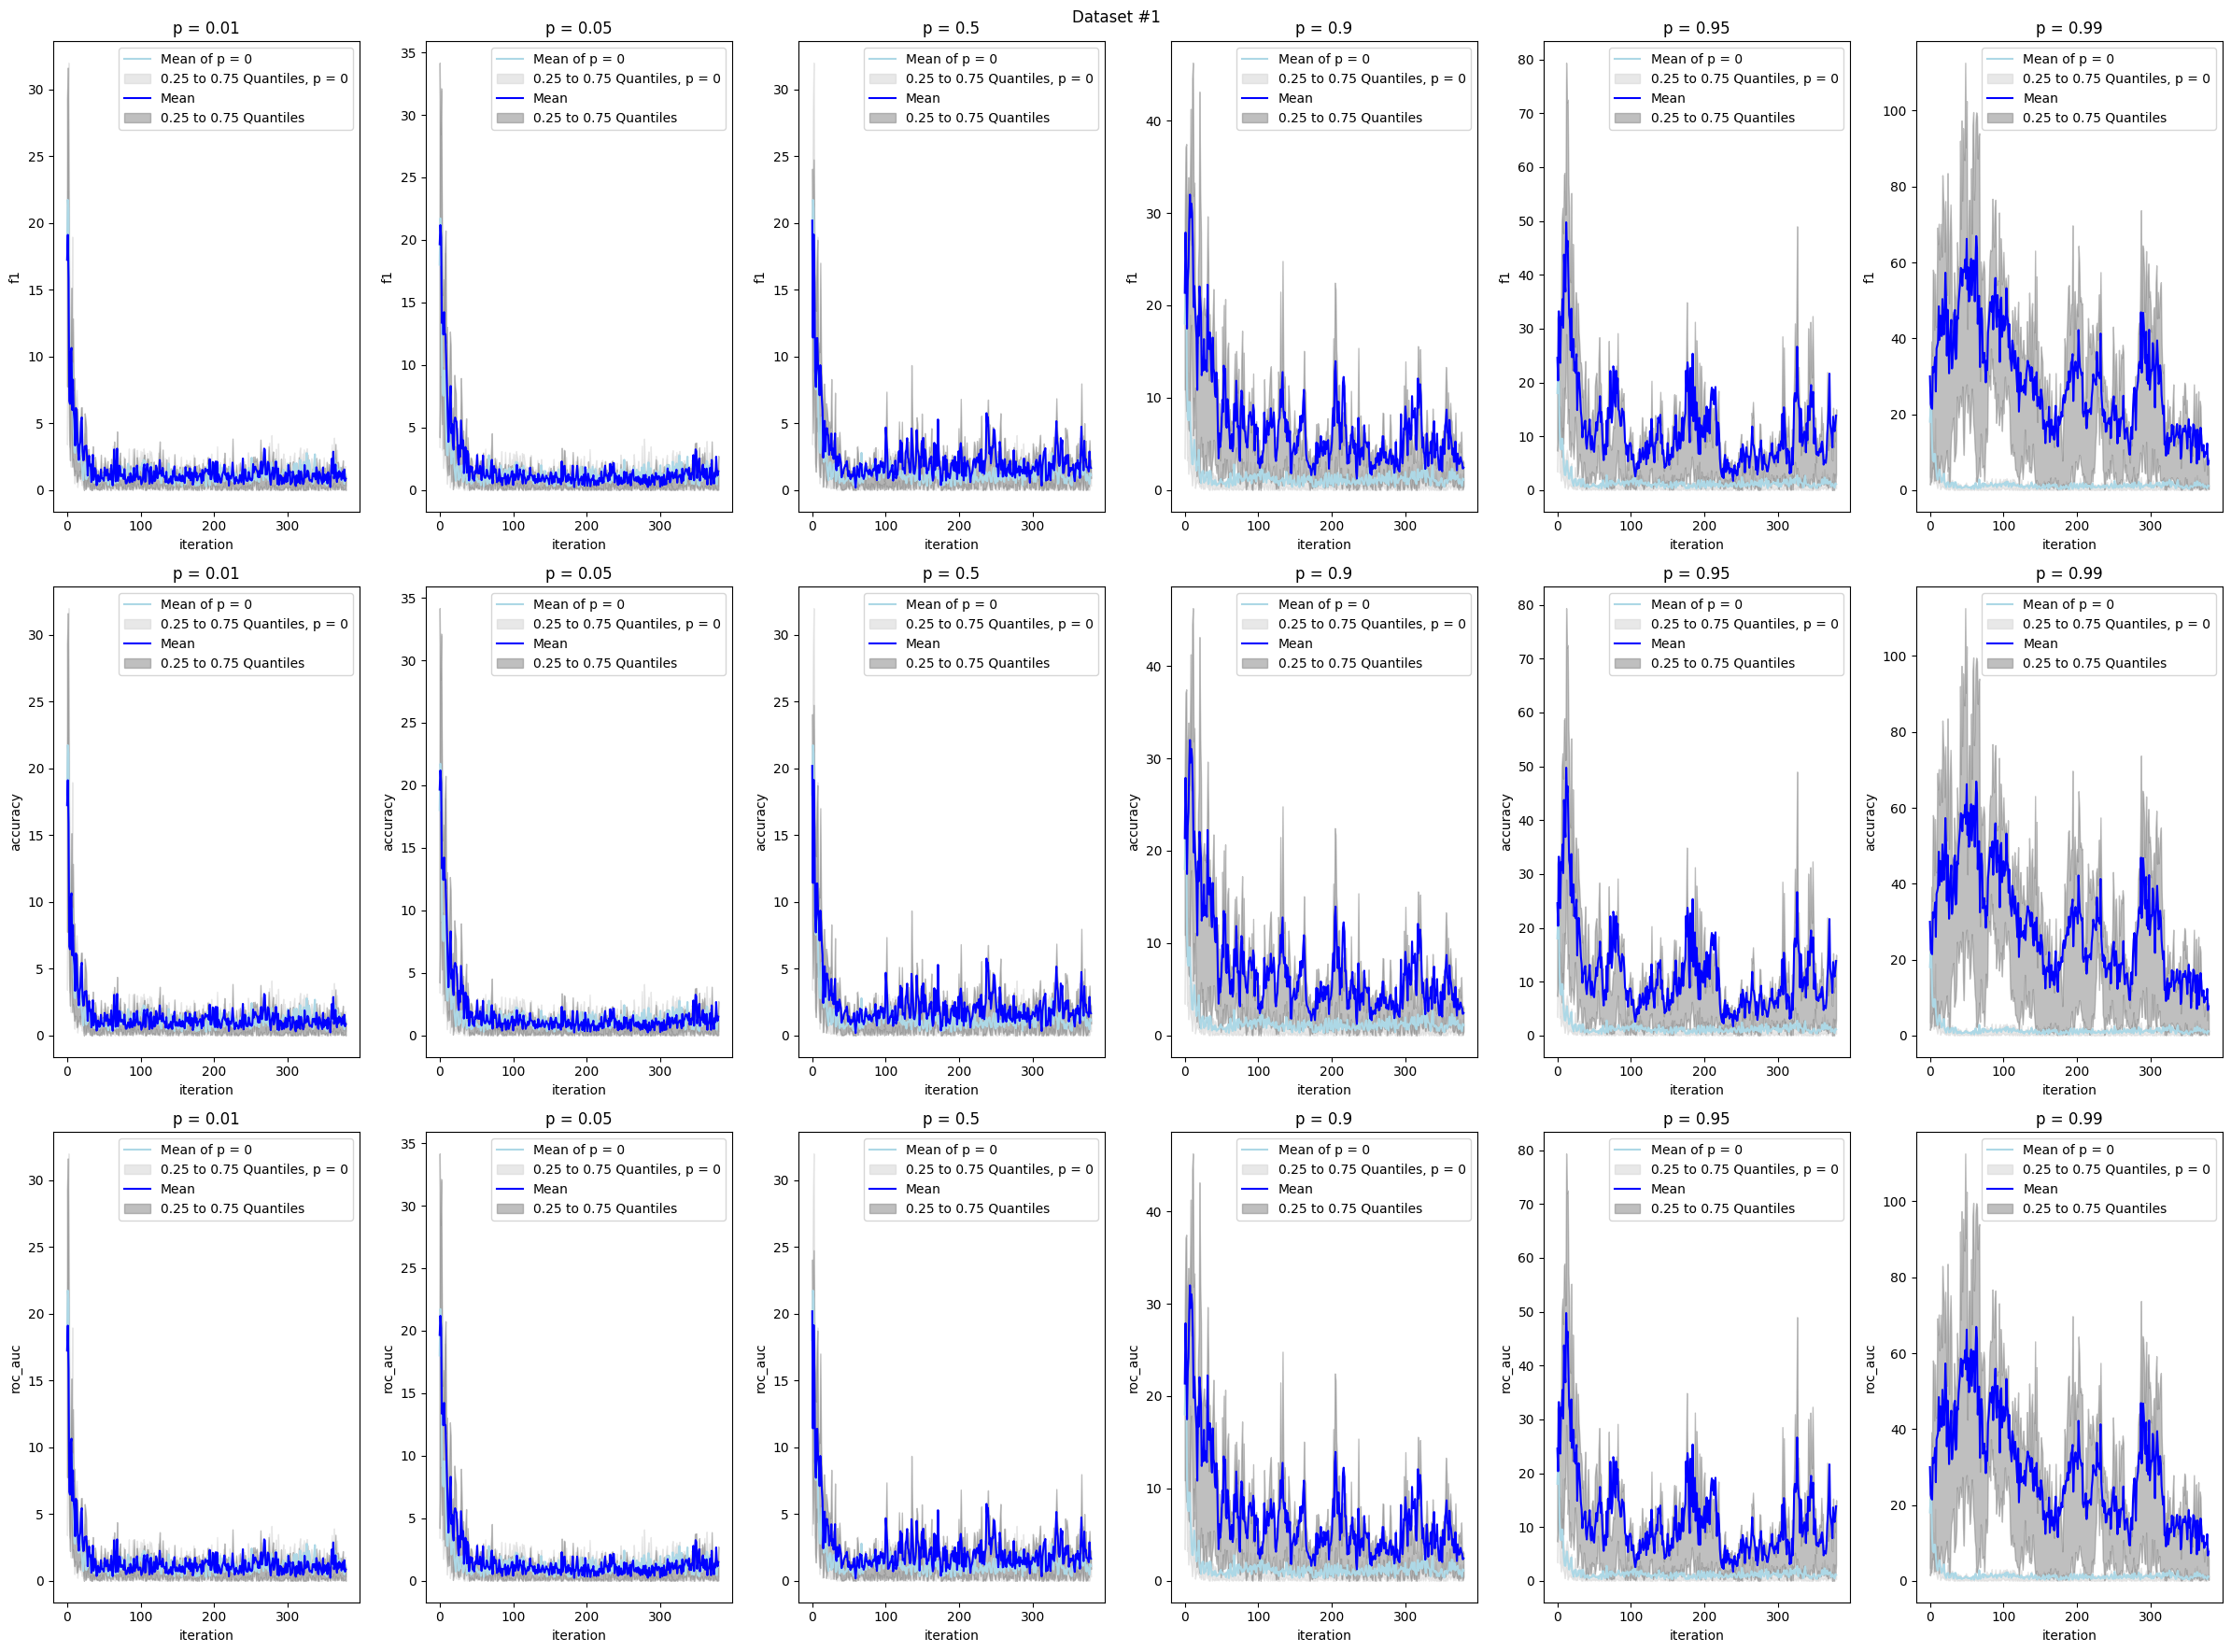

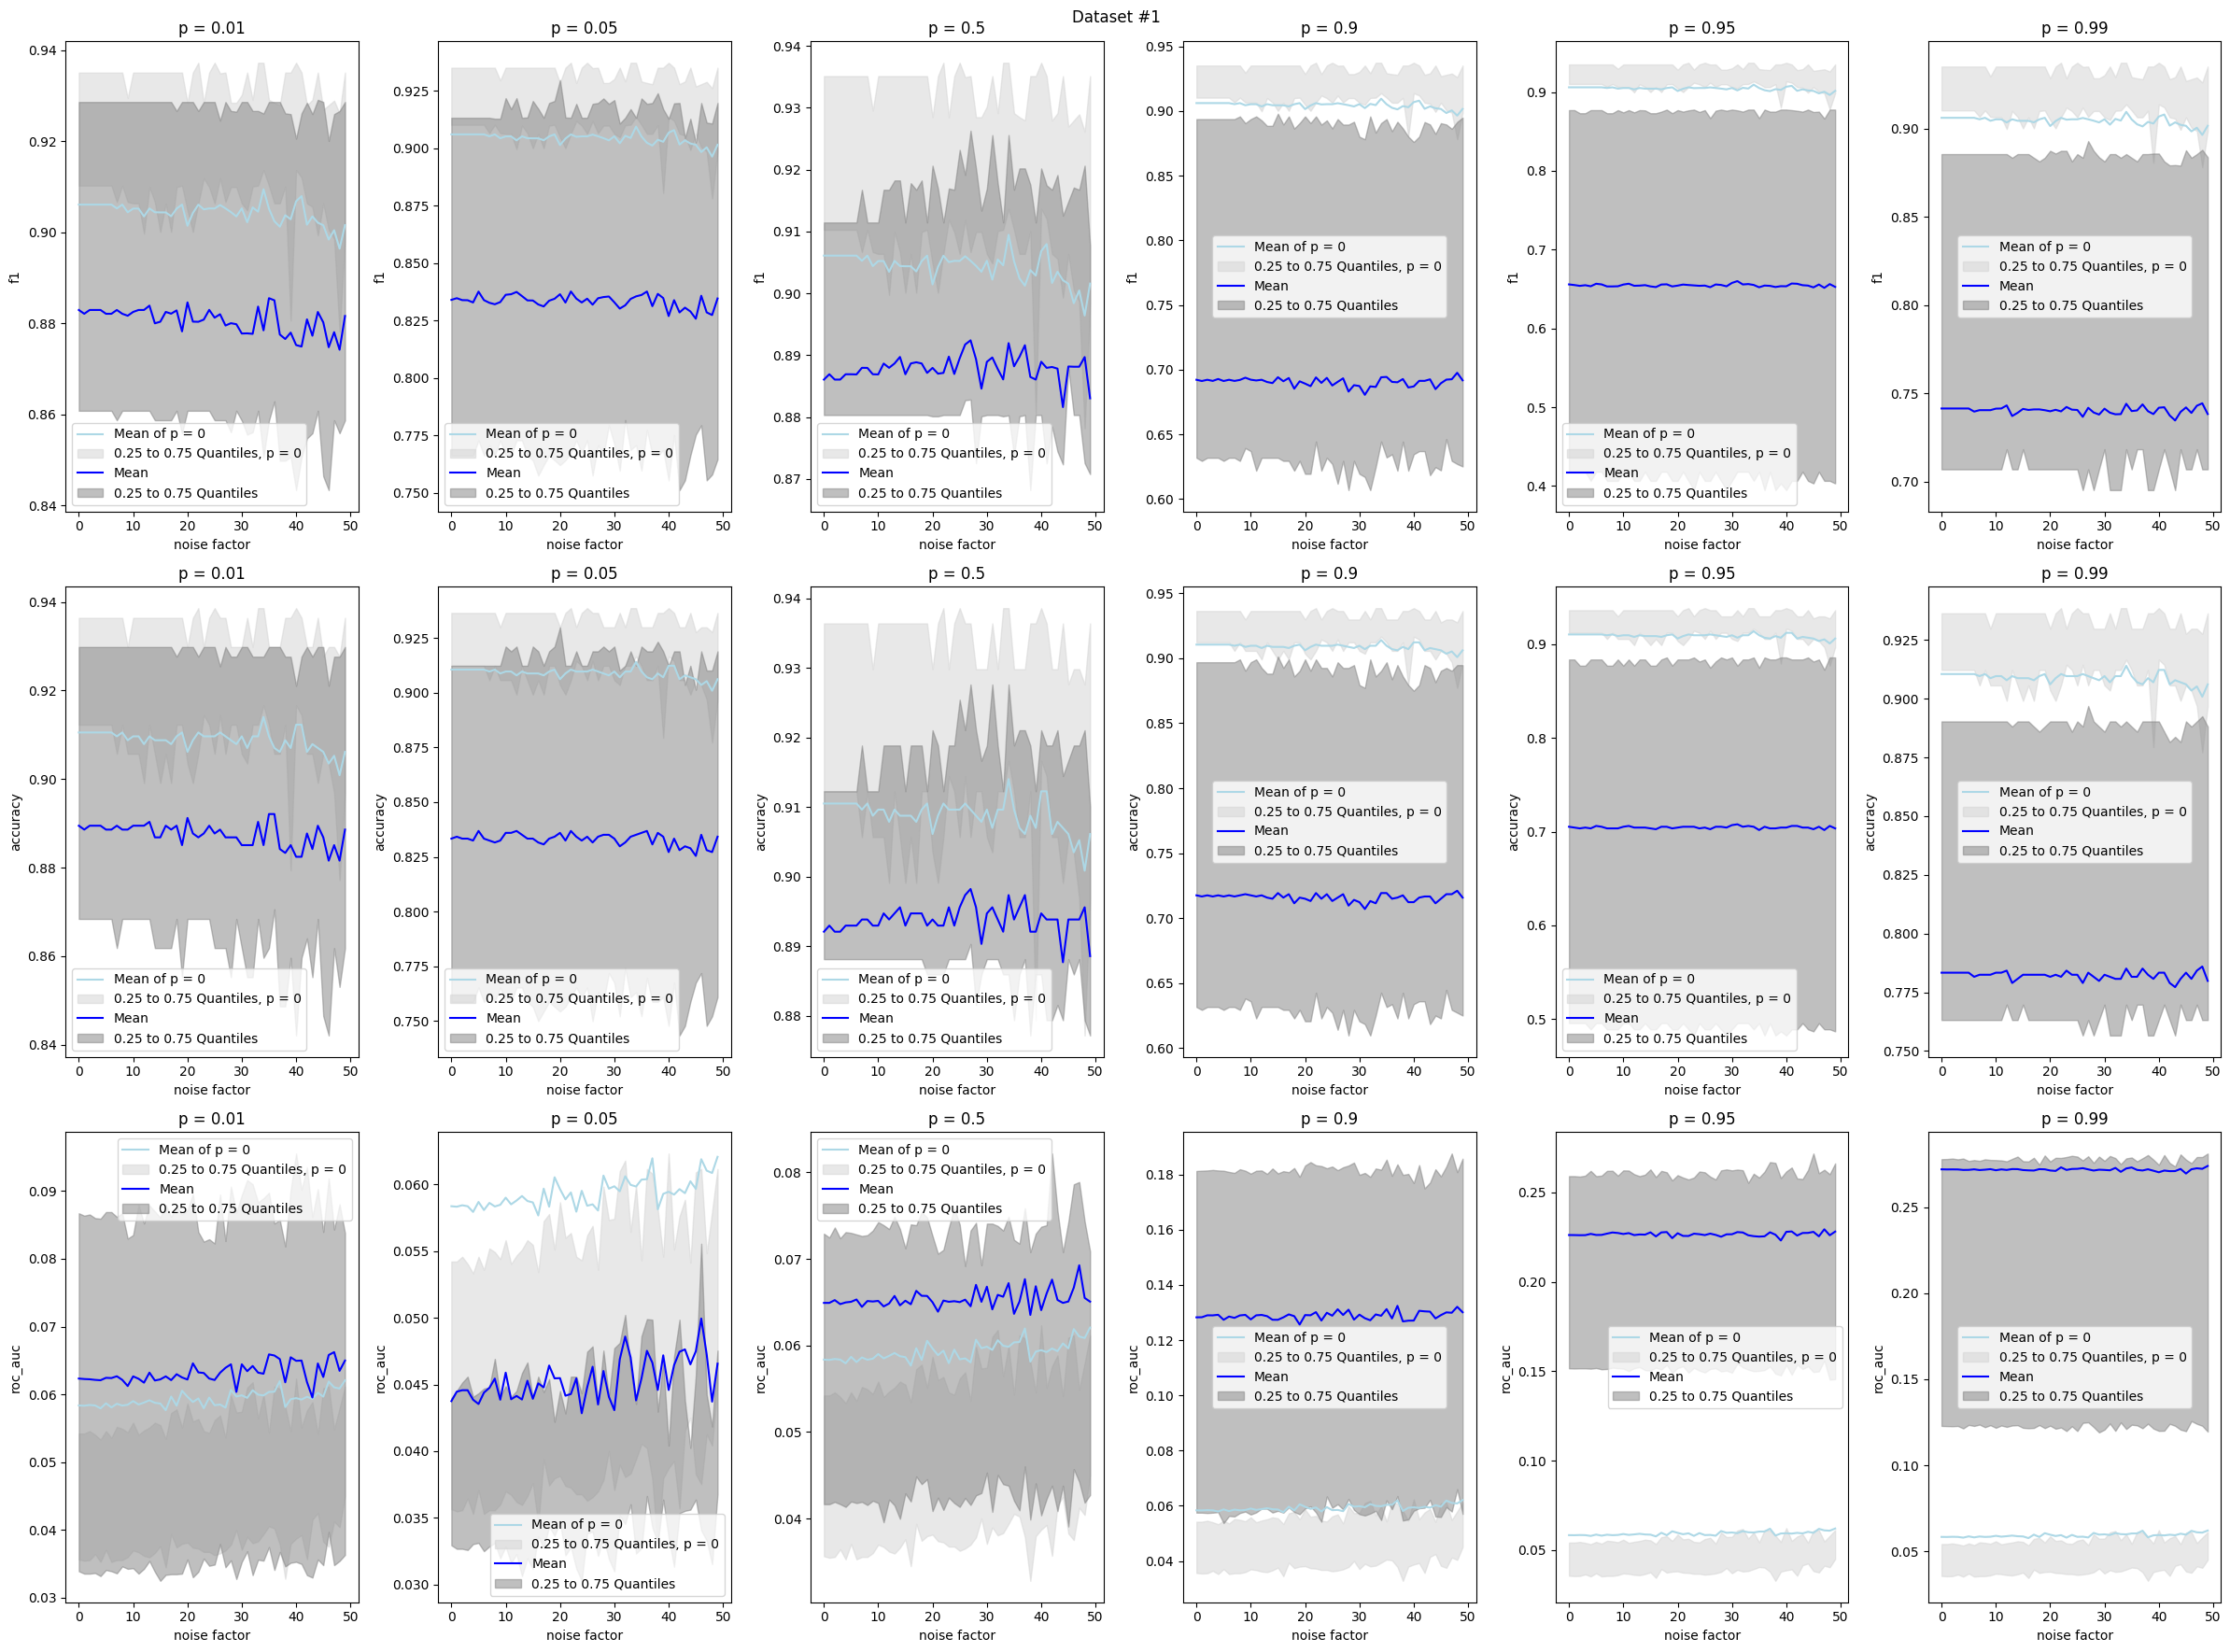

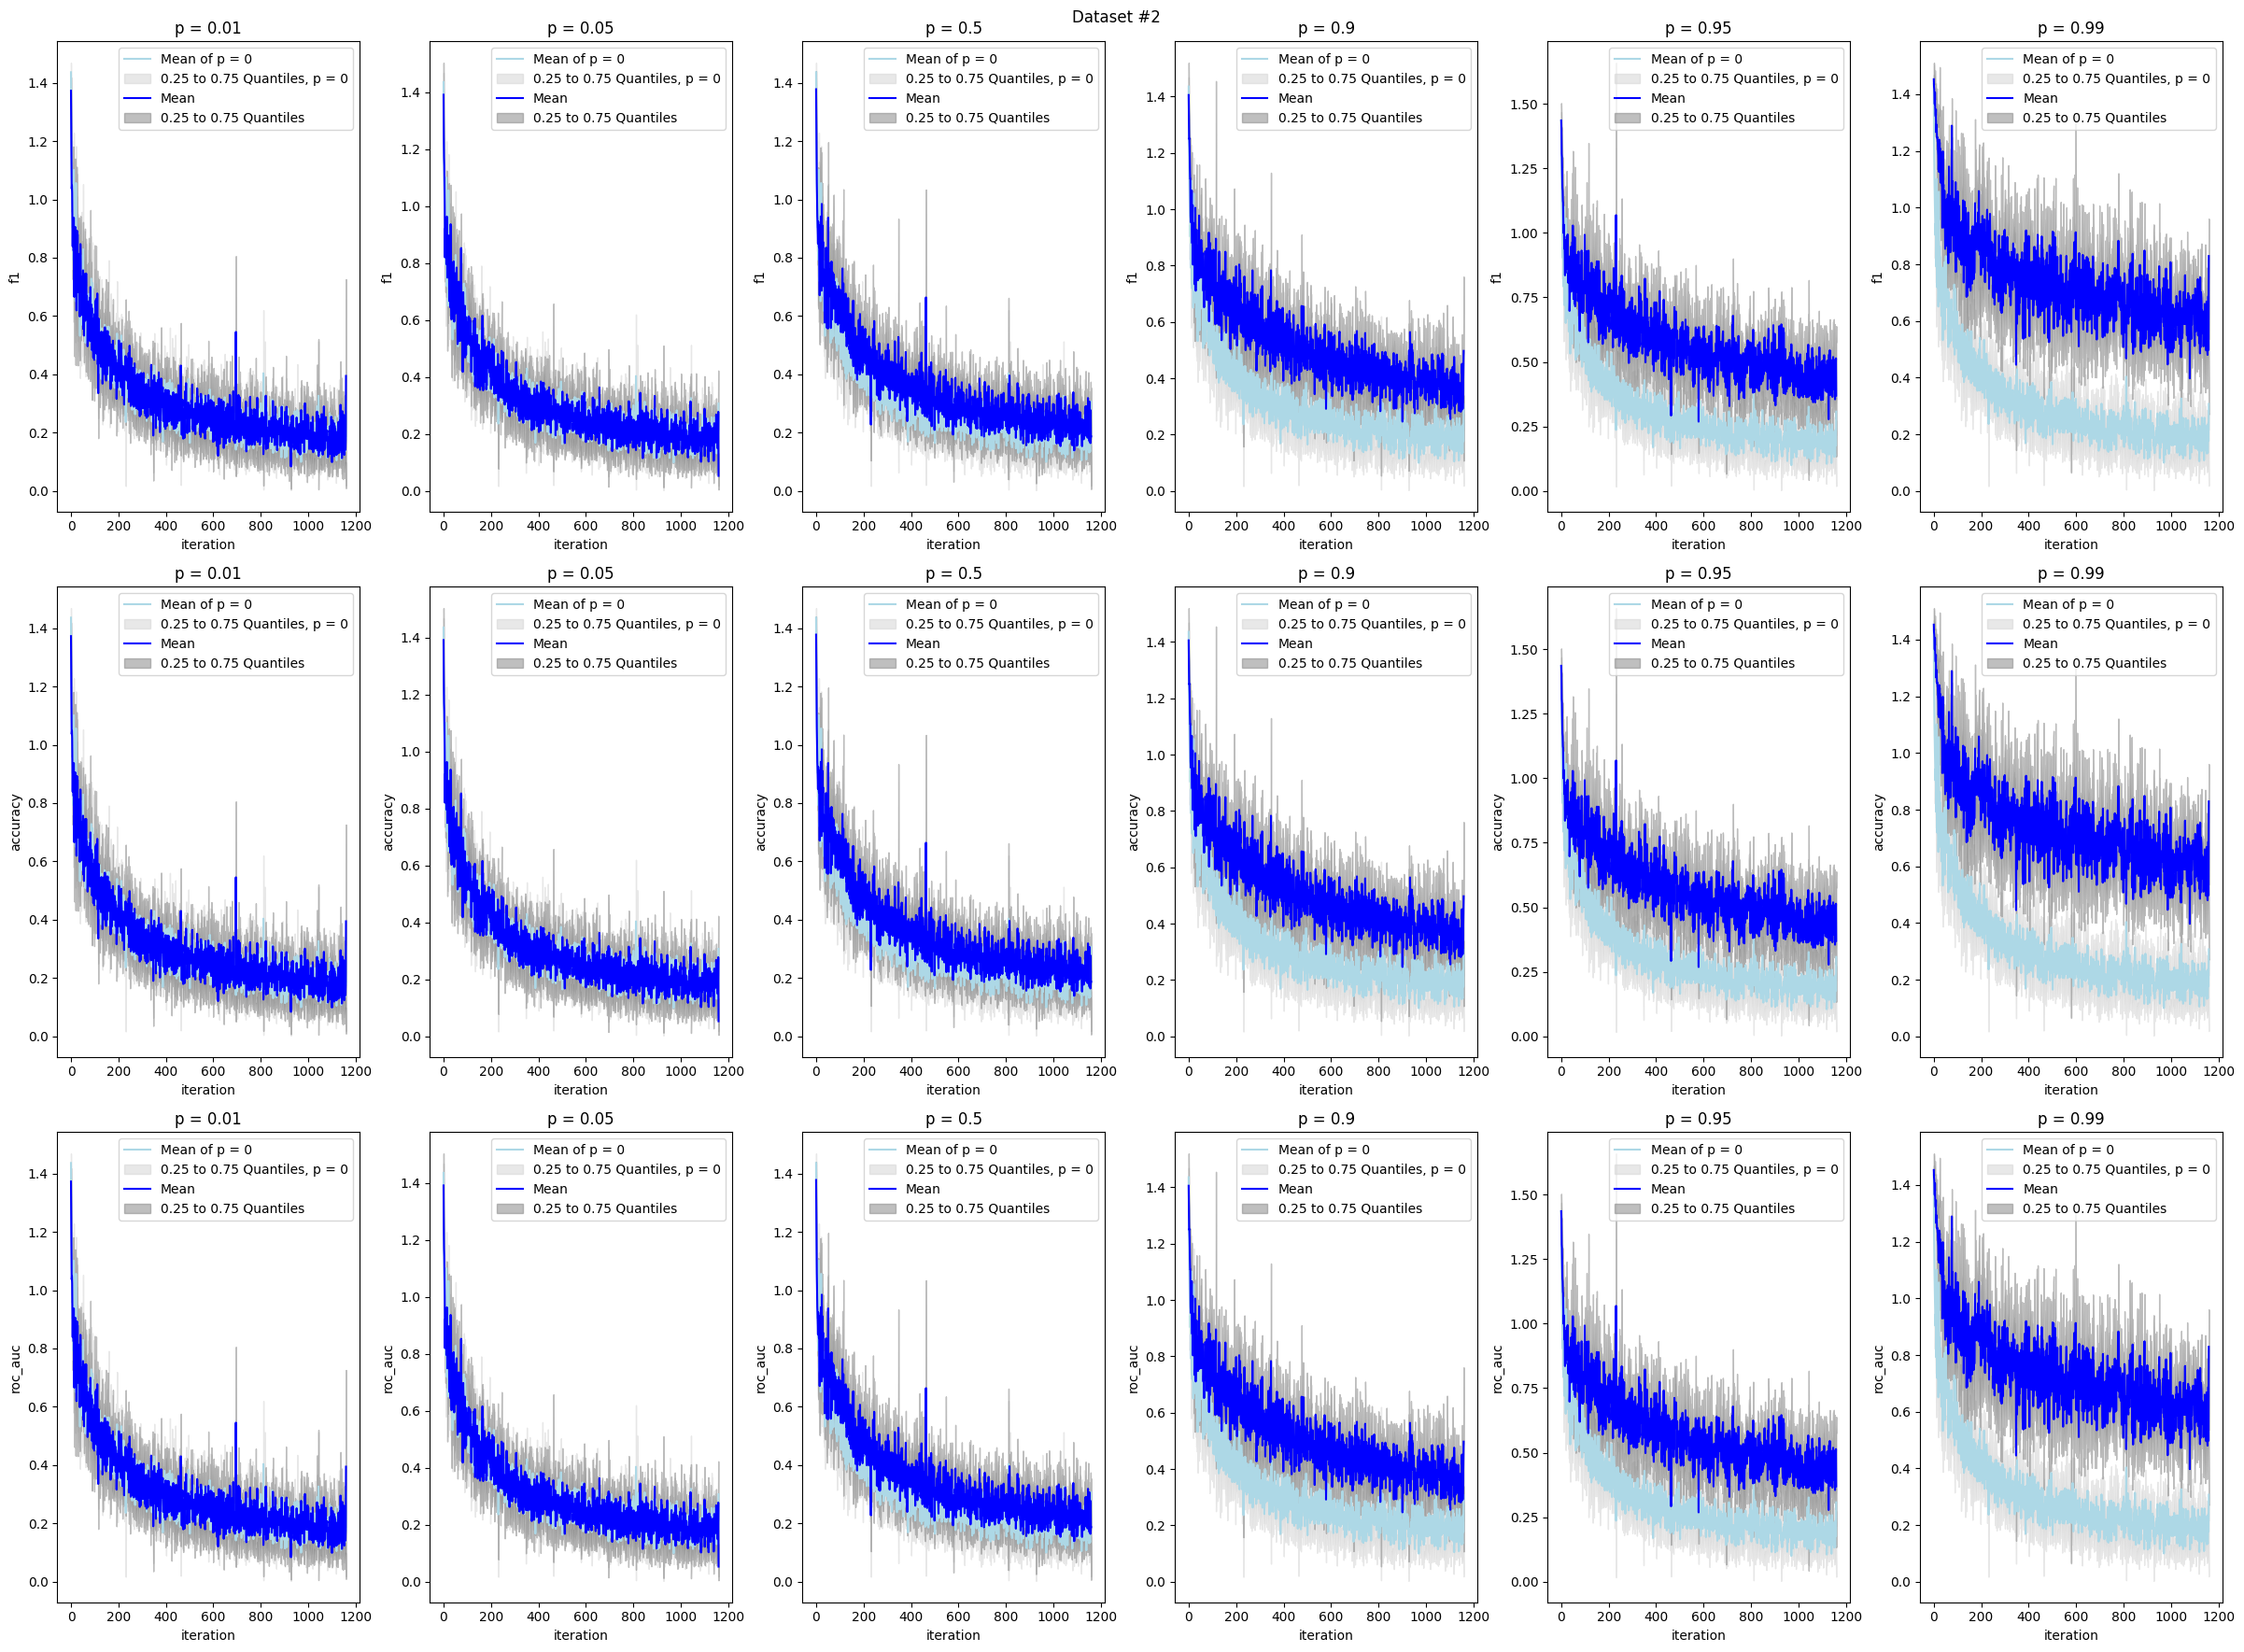

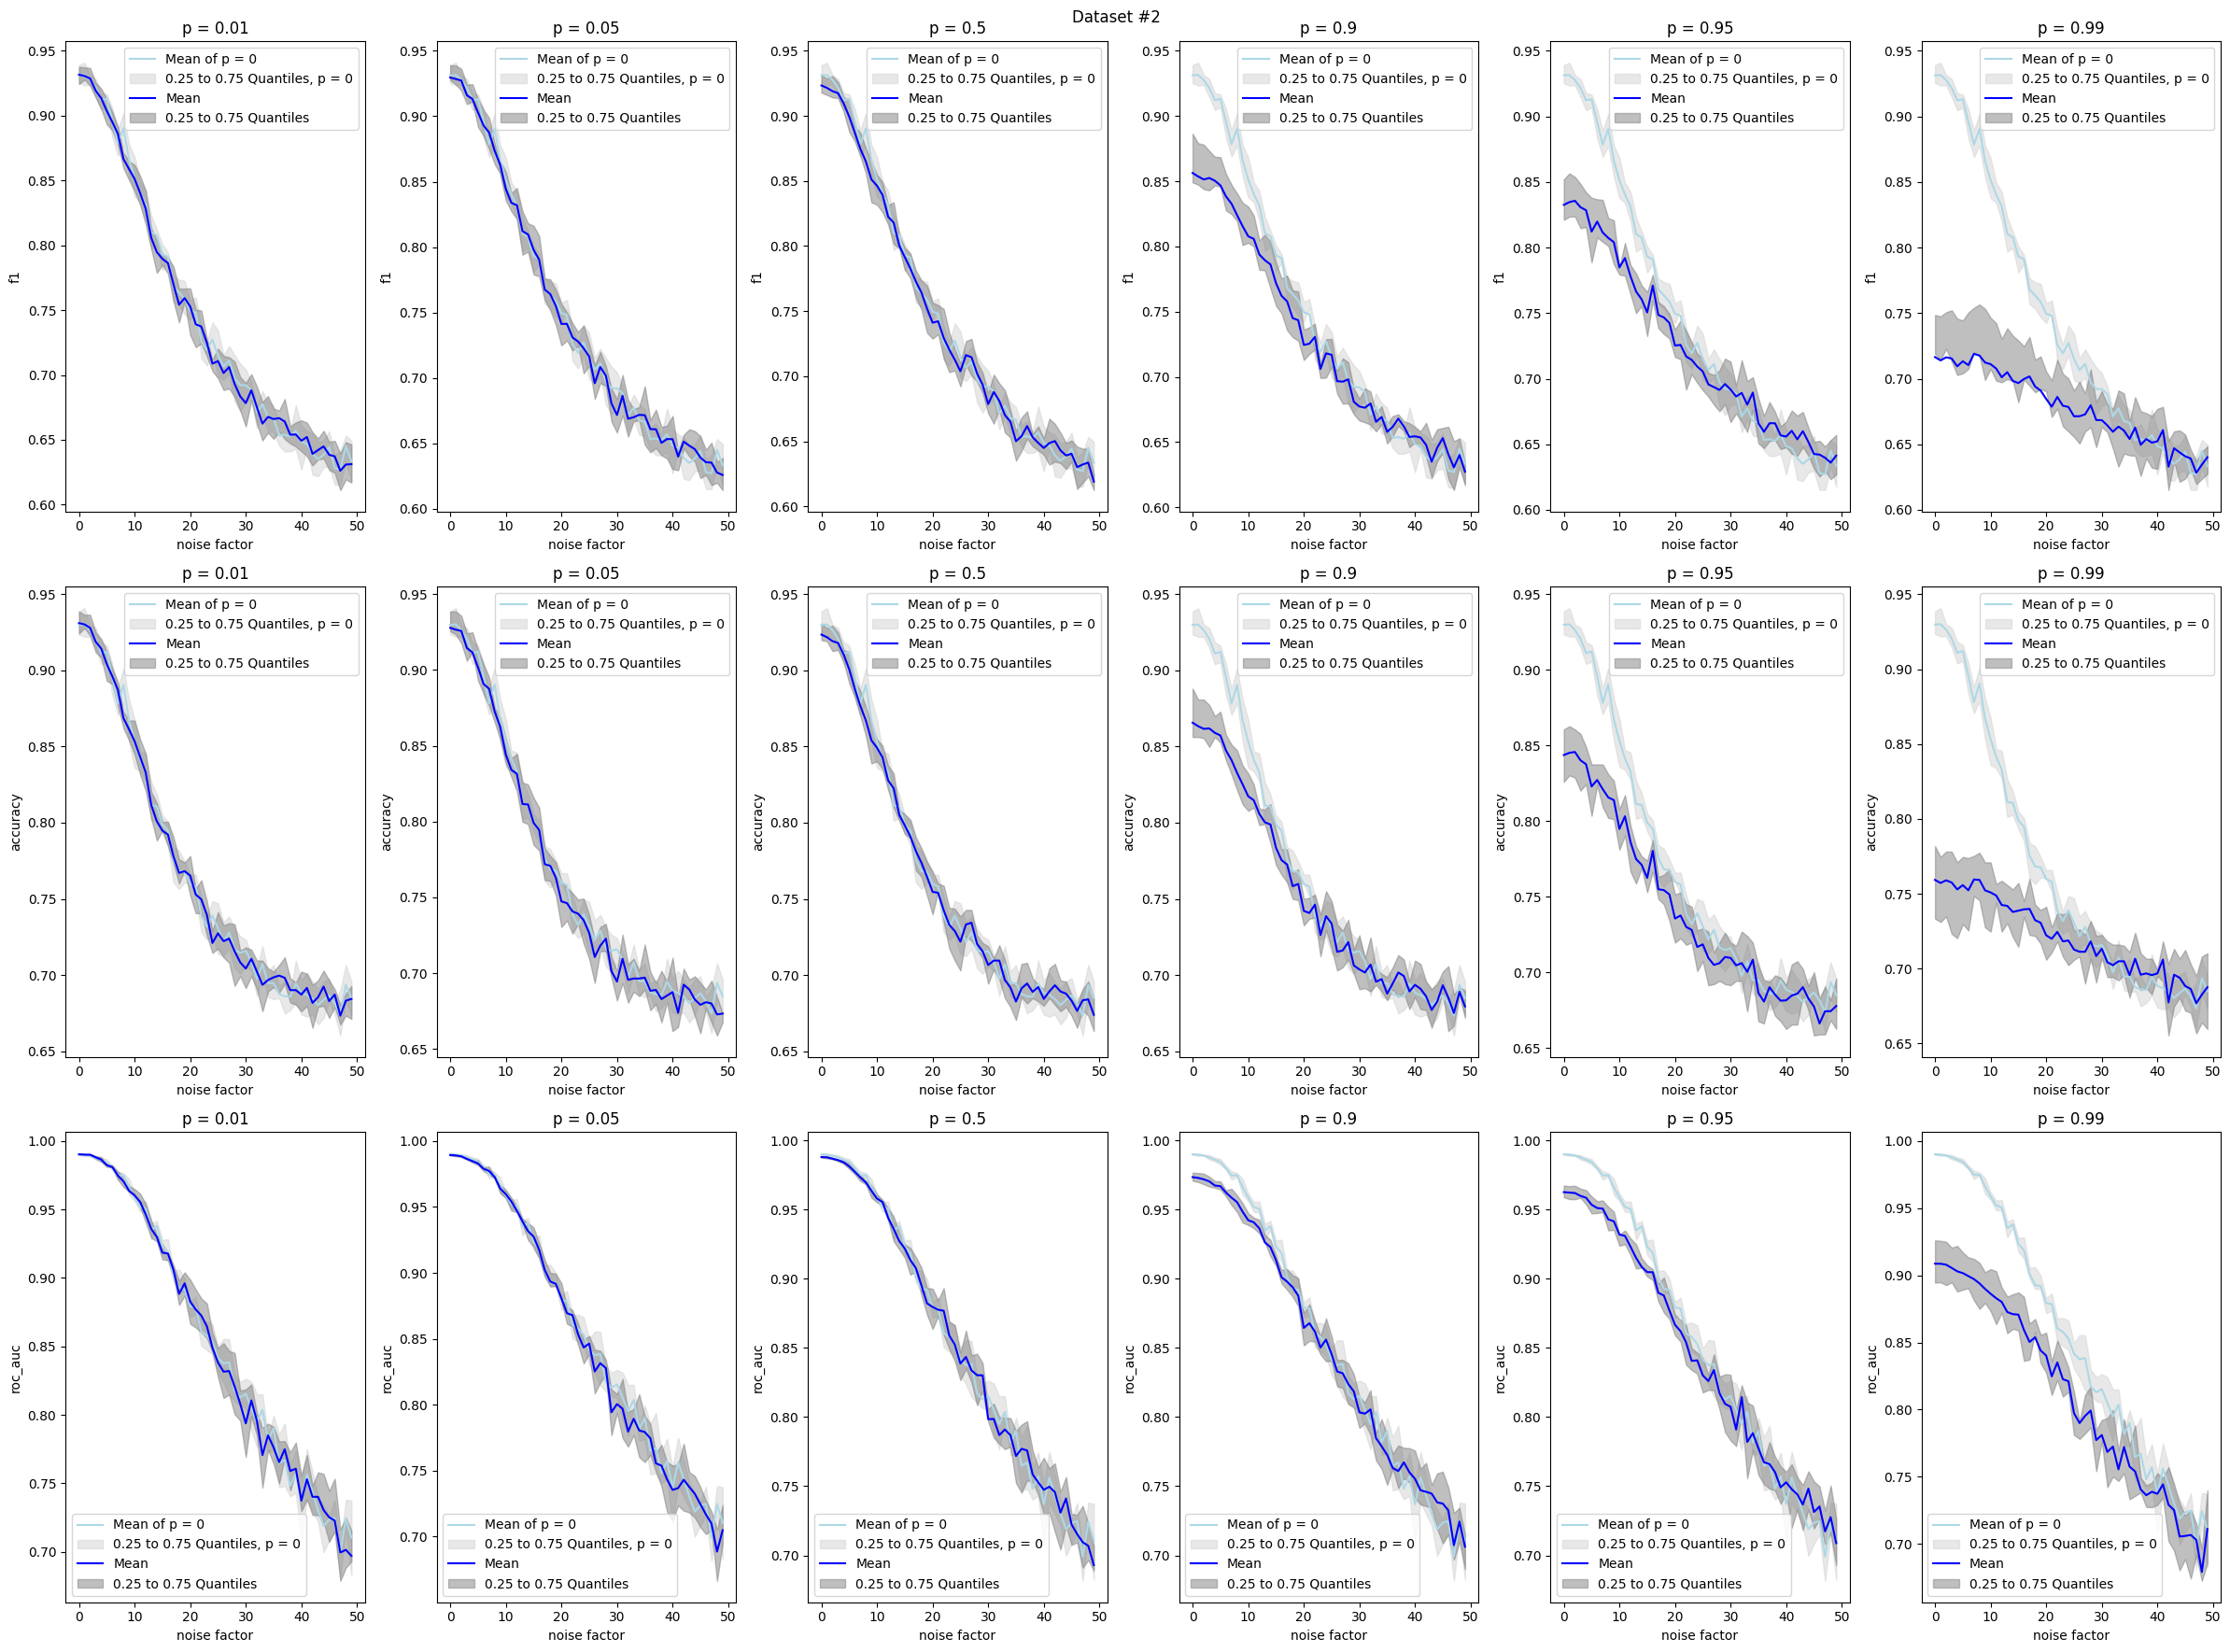

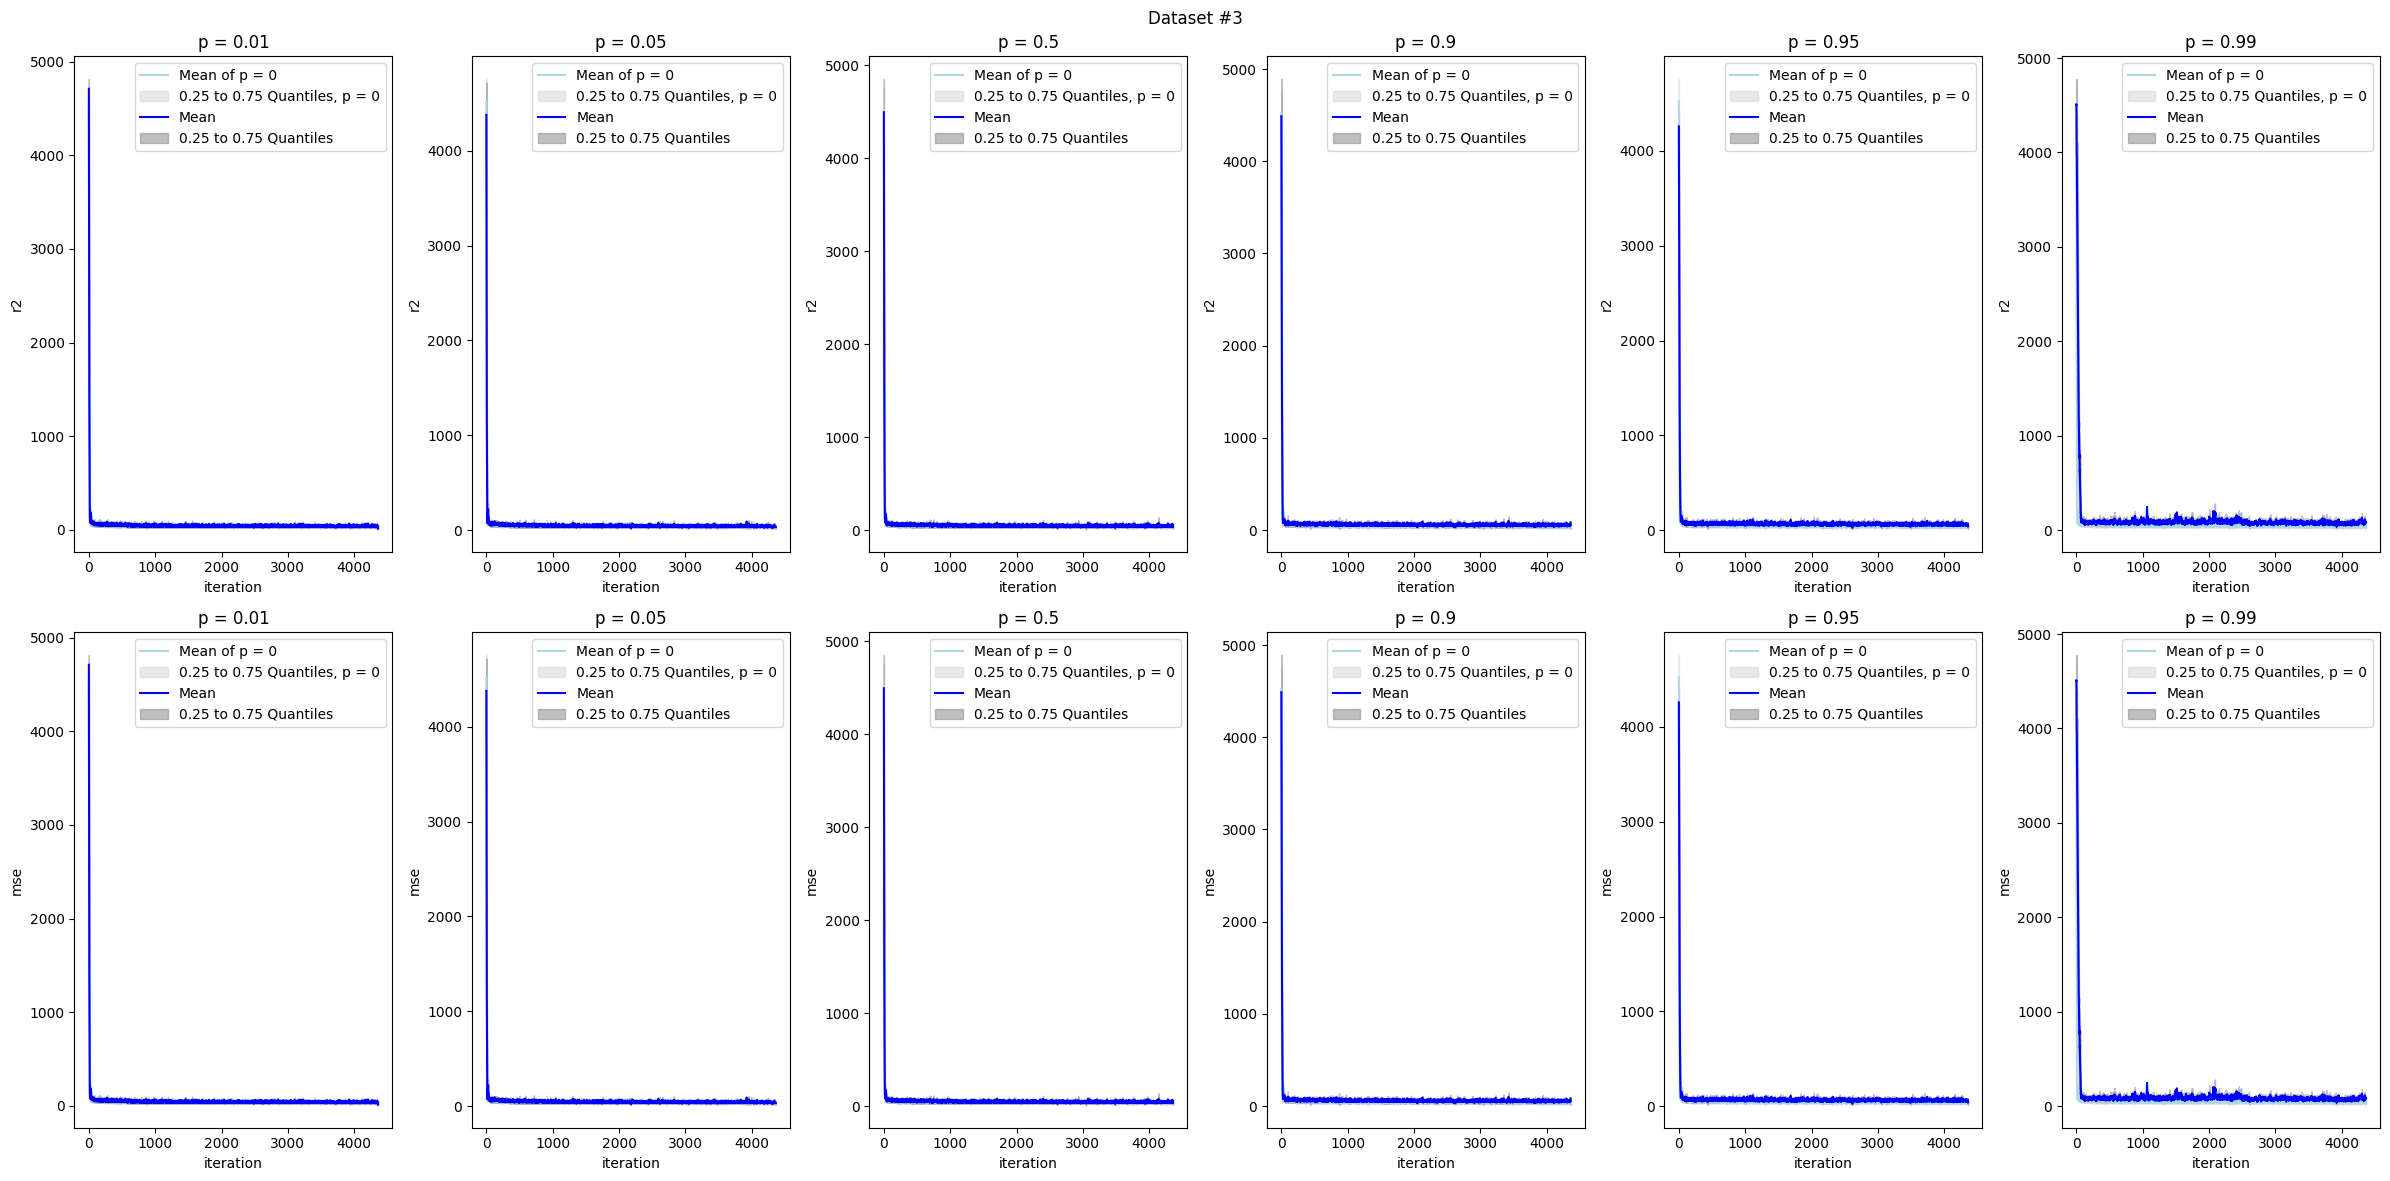

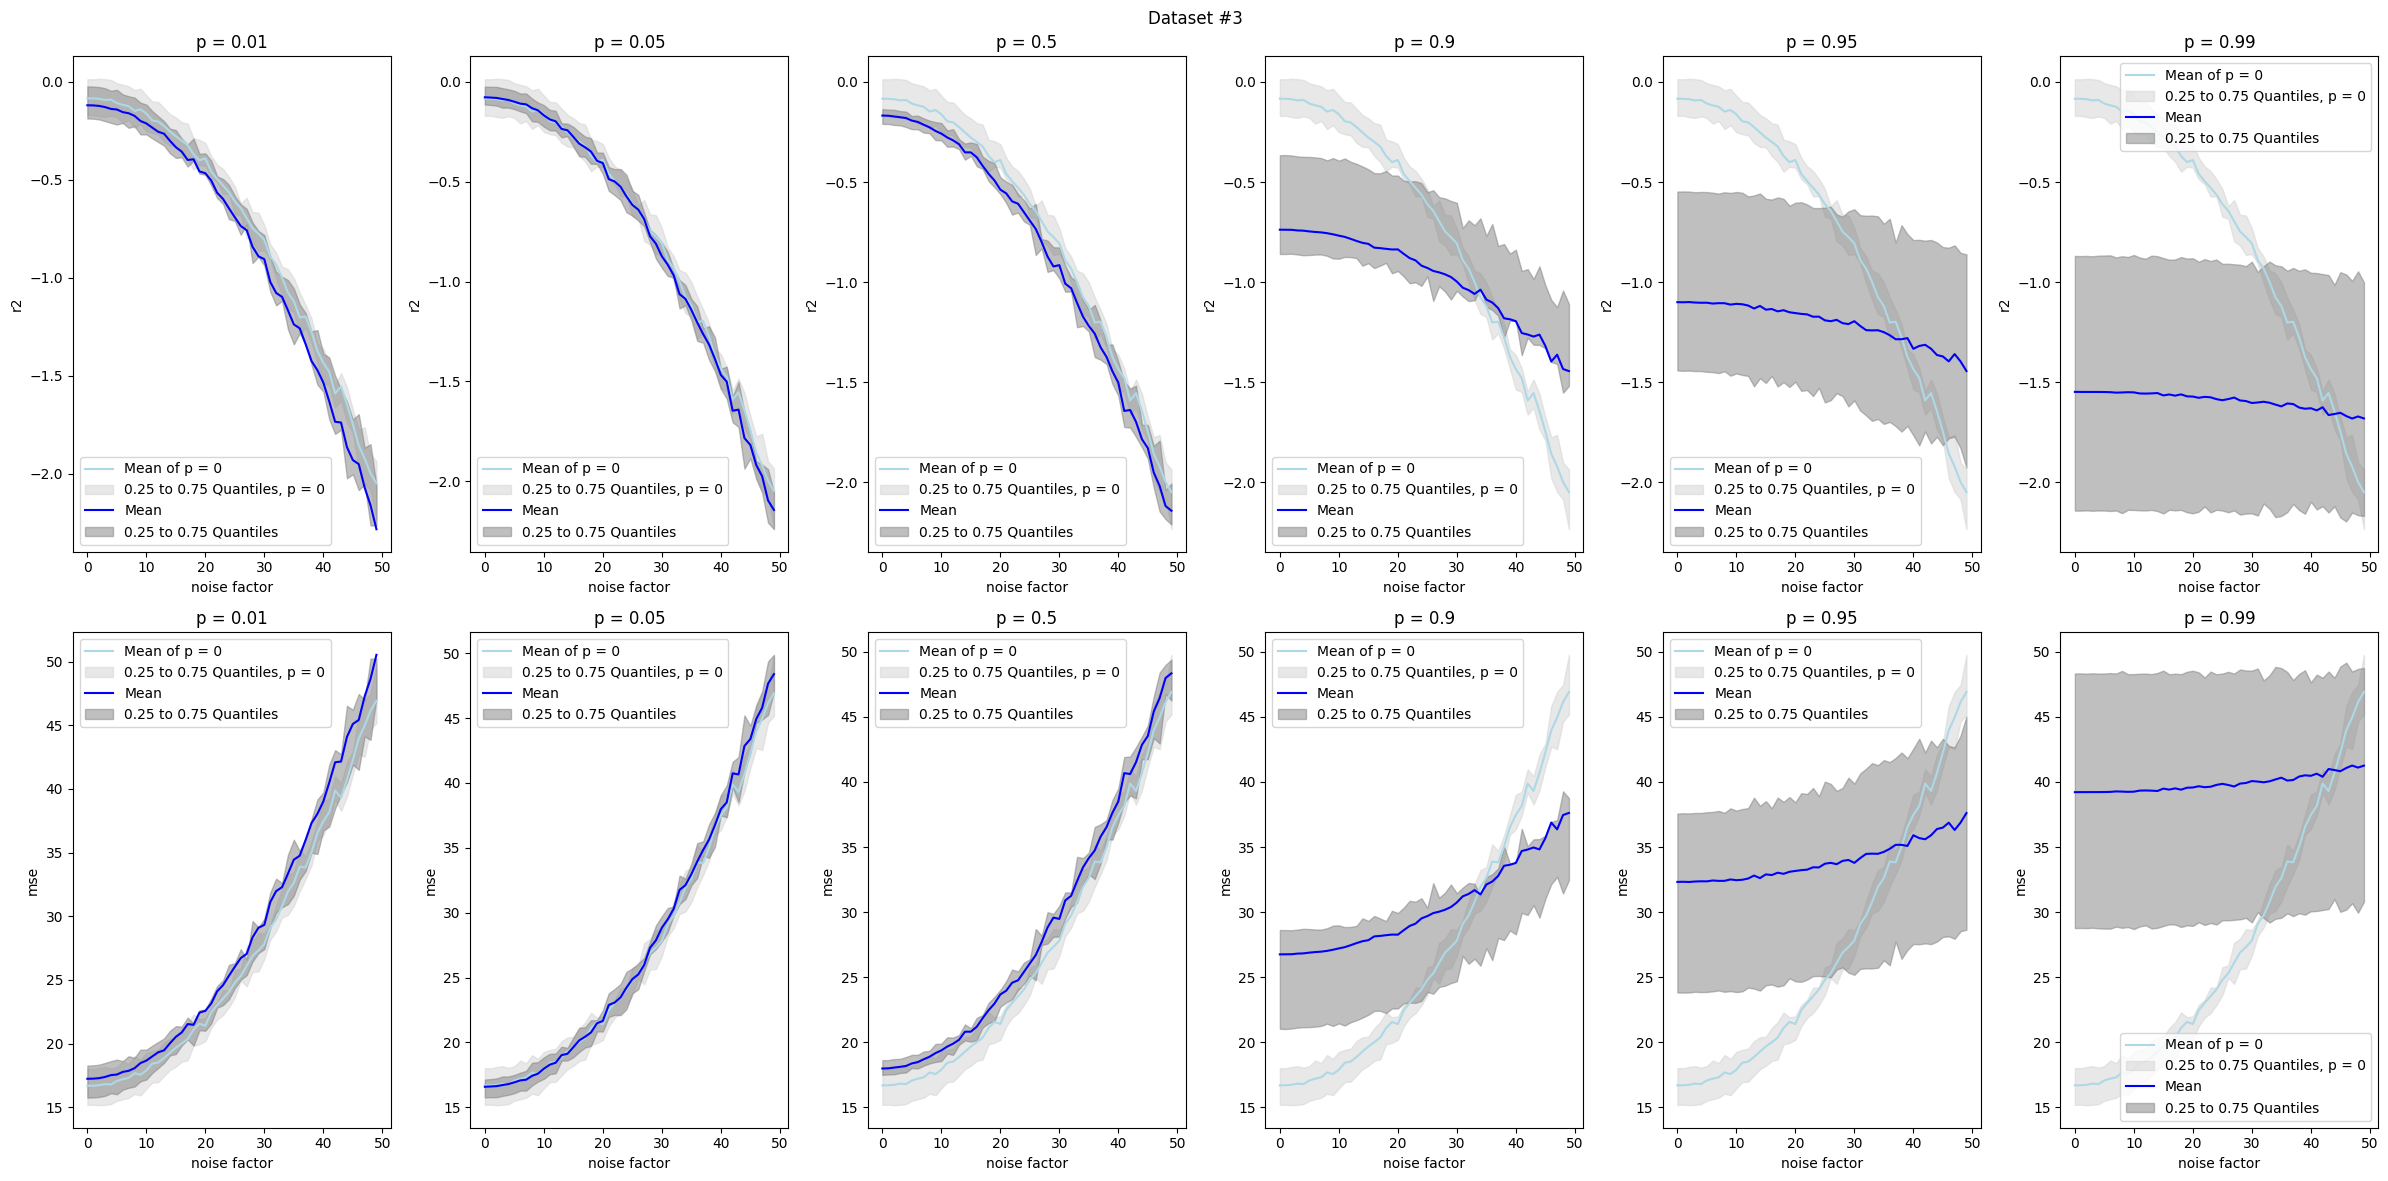

In [ ]:
import matplotlib.pyplot as plt

def plot_curve(
    ax: object,
    means: pd.Series,
    lowerqs: pd.Series,
    upperqs: pd.Series,
    zmeans: pd.Series,
    zlowerqs: pd.Series,
    zupperqs: pd.Series,
    X: pd.Series,
    title: str,
    xlabel: str,
    ylabel: str,
):
    ax.plot(X, zmeans, label='Mean of p = 0', color='lightblue')
    ax.fill_between(X, zlowerqs, zupperqs, color='lightgray', alpha=0.5, label='0.25 to 0.75 Quantiles, p = 0')
    ax.plot(X, means, label='Mean', color='blue')
    ax.fill_between(X, lowerqs, upperqs, color='gray', alpha=0.5, label='0.25 to 0.75 Quantiles')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.legend()

for (measurement, dataset, xlabel) in [
    ('loss', 1, 'iteration'),
    ('evaluate', 1, 'noise factor'),
    ('loss',  2, 'iteration'),
    ('evaluate', 2, 'noise factor'),
    ('loss', 3, 'iteration'),
    ('evaluate', 3, 'noise factor'),
]:
    if measurement == 'loss':
        metrics = ['loss']
    if dataset == 3:
        metrics = ['r2', 'mse']
    else:
        metrics = ['f1', 'accuracy', 'roc_auc']
    
    fig, axs = plt.subplots(len(metrics), 6, figsize=(24, len(metrics) * 6))
    for (i, metric) in enumerate(metrics):
        reference_curve = compute_dataframe(plot_params=PlotParams(
            measurement=measurement,
            dataset=dataset,
            metric=metric,
            p=0,
        ))

        for (j, p) in enumerate([0.01, 0.05, 0.5, 0.9, 0.95, 0.99]):
            plot_params=PlotParams(
                measurement=measurement,
                dataset=dataset,
                metric=metric,
                p=p,
            )

            curve=compute_dataframe(plot_params=plot_params)
            plot_curve(
                ax=axs[i, j],
                means=curve['mean'],
                lowerqs=curve[0.25],
                upperqs=curve[0.75],
                zmeans=reference_curve['mean'],
                zlowerqs=reference_curve[0.25],
                zupperqs=reference_curve[0.75],
                X=curve.index,
                title=f'p = {plot_params.p}',
                xlabel=xlabel,
                ylabel=metric,
            )
    fig.suptitle(f'Dataset #{plot_params.dataset}')
    plt.tight_layout()
    plt.show()